## Project Overview

In this project, I built and trained a neural network model for digit classification using the MNIST dataset — a well-known dataset of handwritten digit images. Each image represents a single digit between 0 and 9, and the goal was to classify each image correctly into one of these ten classes.

To tackle this classification task, I implemented a neural network model using the Keras library. Keras provides a high-level API that simplifies the process of building and training deep learning models.

After constructing and training the model on the labeled images from the MNIST dataset, I evaluated its ability to recognize and classify new, unseen images. The model learns to map image pixels to digit labels by identifying meaningful patterns during the training process.

In addition to model accuracy, I also explored the effect of different hyperparameters — such as the number of neurons, the number of layers, and the choice of activation function — on the model’s performance.


In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Data Loading and Preparation

The MNIST dataset was loaded using Keras's built-in function.

The dataset contains grayscale images of handwritten digits from 0 to 9. Each image is represented as a 28x28 pixel array. To make the data suitable for a fully connected neural network, each image was flattened into a 1D vector of length 784 (since 28 * 28 = 784).


## Displaying a Sample of Images from the Dataset

To visualize the data, I implemented a helper function called `display_image_from_vector` that reconstructs and displays a digit image from its flattened vector form. Since each image in the dataset is originally 28x28 pixels and stored as a vector of length 784, the function reshapes the vector back into a 28x28 matrix.

Using this function, I displayed 16 randomly selected images from the dataset, along with their corresponding labels, to ensure that the images and labels are aligned correctly.

This step serves as an important sanity check to verify that the dataset has been loaded and preprocessed properly.


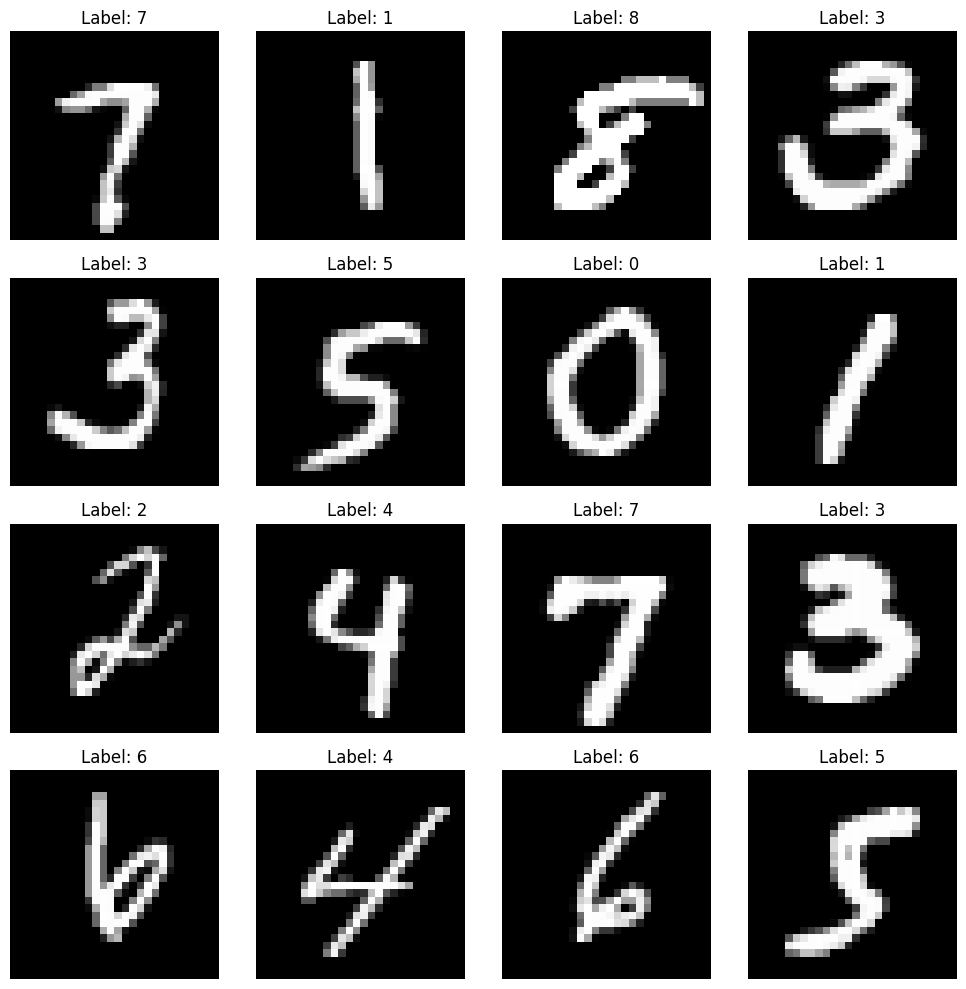

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def display_image_from_vector(observation):
    image = observation.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

random_indices = np.random.choice(X_train.shape[0], 16, replace=False)

plt.figure(figsize=(10, 10))

for i, index in enumerate(random_indices):
    plt.subplot(4, 4, i + 1)
    display_image_from_vector(X_train[index])
    plt.title(f'Label: {y_train[index]}')

plt.tight_layout()
plt.show()

## Building the Neural Network Model

To build the classification model, I used the `Sequential` API from Keras. The model consists of two fully connected (`Dense`) layers:

1. The first layer contains 512 neurons and uses the ReLU activation function. It receives input vectors of shape `(784,)`, corresponding to the flattened 28x28 pixel images.

2. The second (output) layer contains 10 neurons — one for each digit class (0 through 9). This layer uses the `softmax` activation function to output a probability distribution over the classes.

Dense Layer with 10 neurons and softmax activation:

10 neurons- The MNIST dataset has 10 classes (digits 0 through 9). Each neuron will correspond to one of the digit classes.

Softmax Activation Function- Softmax is used for multi-class classification problems. It outputs a probability distribution over the 10 classes, allowing the model to make a probabilistic prediction for each class.

The model was compiled using the Adam optimizer and the `sparse_categorical_crossentropy` loss function, which is suitable for multi-class classification when the labels are provided as integers. The model also tracks accuracy as a performance metric.

In [3]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,)))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## Training and Evaluation

Before training the model, the input data was normalized by scaling the pixel values to the range [0, 1]. This was done by converting the data type to `float32` and dividing each value by 255.

The model was then trained using the fit() function for 10 epochs, with a batch size of 128. A validation split of 20% was used to monitor the model’s performance on unseen data during training.

After training, the model was evaluated on the test set using the evaluate() function. The final accuracy was printed.

In [4]:
# Normalizing the input data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/10
375/375 - 6s - 15ms/step - accuracy: 0.9169 - loss: 0.2945 - val_accuracy: 0.9557 - val_loss: 0.1548
Epoch 2/10
375/375 - 5s - 14ms/step - accuracy: 0.9662 - loss: 0.1204 - val_accuracy: 0.9662 - val_loss: 0.1128
Epoch 3/10
375/375 - 4s - 11ms/step - accuracy: 0.9767 - loss: 0.0801 - val_accuracy: 0.9698 - val_loss: 0.0980
Epoch 4/10
375/375 - 4s - 11ms/step - accuracy: 0.9841 - loss: 0.0565 - val_accuracy: 0.9717 - val_loss: 0.0923
Epoch 5/10
375/375 - 6s - 16ms/step - accuracy: 0.9886 - loss: 0.0411 - val_accuracy: 0.9759 - val_loss: 0.0774
Epoch 6/10
375/375 - 4s - 11ms/step - accuracy: 0.9917 - loss: 0.0314 - val_accuracy: 0.9749 - val_loss: 0.0788
Epoch 7/10
375/375 - 5s - 14ms/step - accuracy: 0.9937 - loss: 0.0231 - val_accuracy: 0.9775 - val_loss: 0.0771
Epoch 8/10
375/375 - 5s - 13ms/step - accuracy: 0.9957 - loss: 0.0181 - val_accuracy: 0.9775 - val_loss: 0.0763
Epoch 9/10
375/375 - 5s - 12ms/step - accuracy: 0.9975 - loss: 0.0127 - val_accuracy: 0.9775 - val_loss:

## Building an Extended Neural Network Model

To explore how a deeper architecture affects performance, I created a new neural network model with an additional hidden layer between the two layers from the original design.


In [5]:
from keras.layers import BatchNormalization, Dropout

model_dense = Sequential()
model_dense.add(Dense(512, activation='relu', input_shape=(784,)))
model_dense.add(Dense(256, activation='relu'))  # Additional fully connected layer
model_dense.add(Dense(10, activation='softmax'))

model_dense.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_dense = model_dense.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)

test_loss_dense, test_accuracy_dense = model_dense.evaluate(X_test, y_test)
print(f'Test accuracy with additional fully connected layer: {test_accuracy_dense:.4f}')

Epoch 1/10
375/375 - 9s - 24ms/step - accuracy: 0.9273 - loss: 0.2539 - val_accuracy: 0.9617 - val_loss: 0.1302
Epoch 2/10
375/375 - 9s - 23ms/step - accuracy: 0.9725 - loss: 0.0909 - val_accuracy: 0.9718 - val_loss: 0.0905
Epoch 3/10
375/375 - 10s - 26ms/step - accuracy: 0.9824 - loss: 0.0574 - val_accuracy: 0.9730 - val_loss: 0.0863
Epoch 4/10
375/375 - 10s - 28ms/step - accuracy: 0.9879 - loss: 0.0400 - val_accuracy: 0.9751 - val_loss: 0.0837
Epoch 5/10
375/375 - 6s - 15ms/step - accuracy: 0.9918 - loss: 0.0264 - val_accuracy: 0.9760 - val_loss: 0.0881
Epoch 6/10
375/375 - 10s - 27ms/step - accuracy: 0.9925 - loss: 0.0232 - val_accuracy: 0.9745 - val_loss: 0.0963
Epoch 7/10
375/375 - 10s - 26ms/step - accuracy: 0.9940 - loss: 0.0189 - val_accuracy: 0.9779 - val_loss: 0.0976
Epoch 8/10
375/375 - 6s - 17ms/step - accuracy: 0.9953 - loss: 0.0133 - val_accuracy: 0.9737 - val_loss: 0.1052
Epoch 9/10
375/375 - 7s - 19ms/step - accuracy: 0.9948 - loss: 0.0147 - val_accuracy: 0.9728 - val_l

Adding a Dropout Layer:

In [6]:
# Define the model with an additional dropout layer
model_dropout = Sequential()
model_dropout.add(Dense(512, activation='relu', input_shape=(784,)))
model_dropout.add(Dropout(0.5))  # Additional dropout layer
model_dropout.add(Dense(10, activation='softmax'))

# Compile the model
model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dropout = model_dropout.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)

# Evaluate the model
test_loss_dropout, test_accuracy_dropout = model_dropout.evaluate(X_test, y_test)
print(f'Test accuracy with additional dropout layer: {test_accuracy_dropout:.4f}')


Epoch 1/10
375/375 - 7s - 18ms/step - accuracy: 0.8907 - loss: 0.3680 - val_accuracy: 0.9532 - val_loss: 0.1725
Epoch 2/10
375/375 - 5s - 13ms/step - accuracy: 0.9496 - loss: 0.1755 - val_accuracy: 0.9653 - val_loss: 0.1229
Epoch 3/10
375/375 - 4s - 12ms/step - accuracy: 0.9619 - loss: 0.1315 - val_accuracy: 0.9682 - val_loss: 0.1035
Epoch 4/10
375/375 - 6s - 16ms/step - accuracy: 0.9679 - loss: 0.1074 - val_accuracy: 0.9718 - val_loss: 0.0948
Epoch 5/10
375/375 - 11s - 28ms/step - accuracy: 0.9721 - loss: 0.0917 - val_accuracy: 0.9745 - val_loss: 0.0828
Epoch 6/10
375/375 - 9s - 24ms/step - accuracy: 0.9761 - loss: 0.0781 - val_accuracy: 0.9773 - val_loss: 0.0801
Epoch 7/10
375/375 - 6s - 17ms/step - accuracy: 0.9776 - loss: 0.0707 - val_accuracy: 0.9780 - val_loss: 0.0744
Epoch 8/10
375/375 - 9s - 24ms/step - accuracy: 0.9809 - loss: 0.0621 - val_accuracy: 0.9788 - val_loss: 0.0718
Epoch 9/10
375/375 - 5s - 13ms/step - accuracy: 0.9827 - loss: 0.0550 - val_accuracy: 0.9793 - val_loss

The Original 2-Layer Network performs the best in terms of test accuracy but shows signs of overfitting with higher training and validation losses.

The Fully Connected Layer model generalizes well with lower validation loss but slightly lower test accuracy.

The Dropout Layer effectively regularizes the model, achieving competitive accuracy and lower validation loss, making it a good choice to prevent overfitting.

## Visualizing Misclassified Images

To better understand the model's behavior and where it struggles, I visualized a sample of images that were incorrectly classified by the best-performing neural network.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


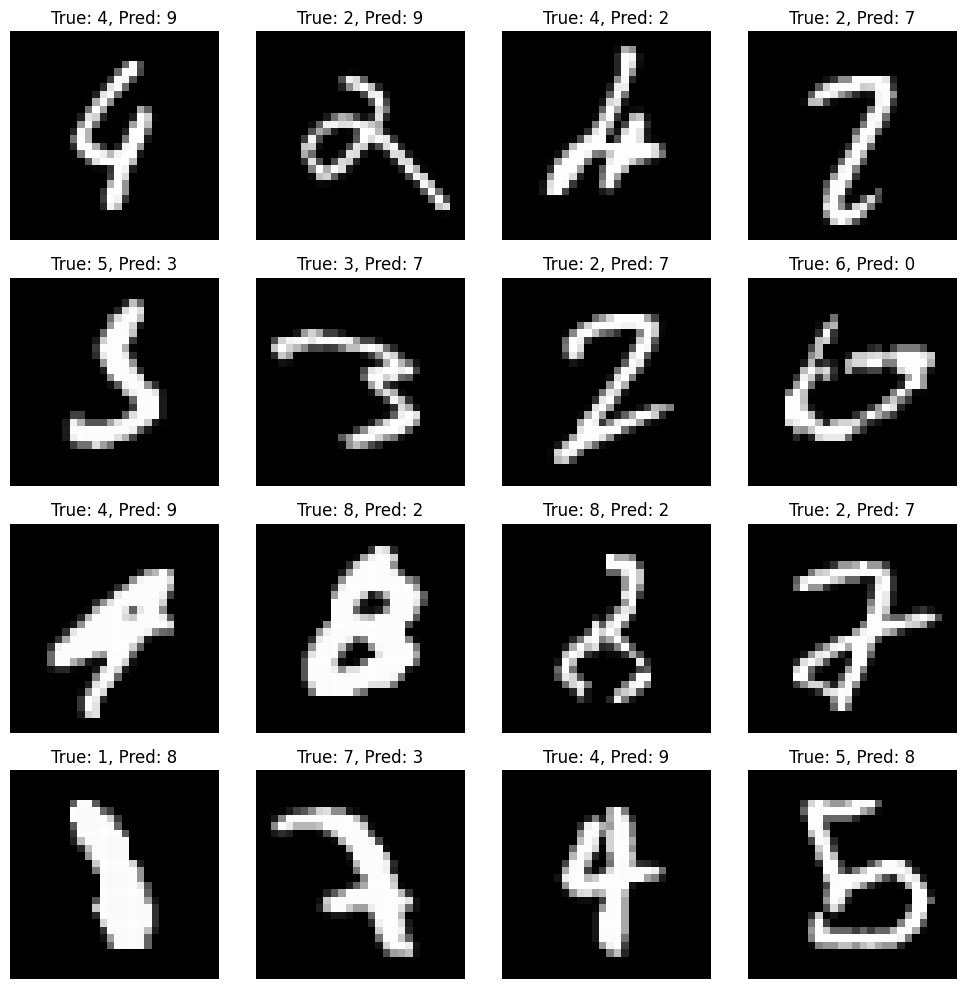

In [7]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

misclassified_indices = np.where(y_pred_classes != y_test)[0]

def display_misclassified_images(X, y_true, y_pred, misclassified_indices, num_images=16):
    plt.figure(figsize=(10, 10))

    for i, index in enumerate(misclassified_indices[:num_images]):
        plt.subplot(4, 4, i + 1)
        image = X[index].reshape(28, 28)
        plt.imshow(image, cmap='gray')
        plt.title(f'True: {y_true[index]}, Pred: {y_pred[index]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_misclassified_images(X_test, y_test, y_pred_classes, misclassified_indices)

The original 2-layer network performed the best, indicating that for this problem, a simpler architecture was sufficient and effective.

Adding more layers (fully connected) and dropout improved model stability and generalization but did not significantly enhance accuracy.

Misclassified images provided insights into specific cases where the model had difficulty distinguishing between certain digits.

**Conclusion:**

The work demonstrated the importance of model architecture in neural network performance. While more complex models can provide benefits in stability and generalization, a simpler model was most effective for the MNIST digit classification task. Further optimization and experimentation with hyperparameters and architectures could potentially improve performance even more.